In [1]:
import pandas as pd 
from sklearn import preprocessing 
data = pd.read_csv("../datasets/amer_rev.csv") 
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from modutils import mod_calc
device = torch.device('cpu')

In [2]:
G = nx.Graph()
G.add_edges_from(data.values)

comm_dict = partition(G)
clusters_number = len(np.array(list(set(comm_dict.values()))))

In [3]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)  

In [4]:
class CDCGS(nn.Module):
    def __init__(self, A_hat, num_feat, num_hidden):
        super(CDCGS, self).__init__()
        self.num_feat = num_feat
        self.num_hidden = num_hidden
        self.A_hat = A_hat
        self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
        I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
        self.I = torch.tensor(I,dtype=torch.float)

    def forward(self, X, A_hat,temp):
        global featureSelector
        global weight_feature
        featureSelector = self.W_0
        results = torch.zeros(self.W_0.size())
        x = 750
        for i in range(x):
            results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
        weight_feature = results/x

        H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
        H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
        H = torch.div(H, H.sum(axis=0))
        m = nn.Softmax(dim=0)
        return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)

def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=9e-3,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)

A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)

loss_hist = []
acc_hist = []
temp = 3

for epoch in range(600):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.75
    elif(epoch == 100):
        temp = 2.5
    elif(epoch == 125):
        temp = 2
    elif(epoch == 150):
        temp = 1.8
    elif(epoch == 175):
        temp = 1.25
    elif(epoch == 250):
        temp = 1.00
    elif(epoch == 300):
        temp = 0.75
    elif(epoch == 320):
        temp = 0.5
    elif(epoch == 400):
        temp = 0.2
    elif(epoch == 475):
        temp = 0.1    
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',epoch,loss)
    loss.backward()
    optimizer.step()

/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss 0 tensor(8.0472, grad_fn=<SumBackward0>)
loss 1 tensor(8.0472, grad_fn=<SumBackward0>)
loss 2 tensor(8.0472, grad_fn=<SumBackward0>)
loss 3 tensor(8.0472, grad_fn=<SumBackward0>)
loss 4 tensor(8.0472, grad_fn=<SumBackward0>)
loss 5 tensor(8.0472, grad_fn=<SumBackward0>)
loss 6 tensor(8.0471, grad_fn=<SumBackward0>)
loss 7 tensor(8.0471, grad_fn=<SumBackward0>)
loss 8 tensor(8.0471, grad_fn=<SumBackward0>)
loss 9 tensor(8.0470, grad_fn=<SumBackward0>)
loss 10 tensor(8.0469, grad_fn=<SumBackward0>)
loss 11 tensor(8.0468, grad_fn=<SumBackward0>)
loss 12 tensor(8.0465, grad_fn=<SumBackward0>)
loss 13 tensor(8.0464, grad_fn=<SumBackward0>)
loss 14 tensor(8.0463, grad_fn=<SumBackward0>)
loss 15 tensor(8.0459, grad_fn=<SumBackward0>)
loss 16 tensor(8.0457, grad_fn=<SumBackward0>)
loss 17 tensor(8.0457, grad_fn=<SumBackward0>)
loss 18 tensor(8.0451, grad_fn=<SumBackward0>)
loss 19 tensor(8.0445, grad_fn=<SumBackward0>)
loss 20 tensor(8.0441, grad_fn=<SumBackward0>)
loss 21 tensor(8.0434, 

loss 173 tensor(7.3130, grad_fn=<SumBackward0>)
loss 174 tensor(7.3060, grad_fn=<SumBackward0>)
loss 175 tensor(7.0553, grad_fn=<SumBackward0>)
loss 176 tensor(7.0469, grad_fn=<SumBackward0>)
loss 177 tensor(7.0343, grad_fn=<SumBackward0>)
loss 178 tensor(7.0109, grad_fn=<SumBackward0>)
loss 179 tensor(6.9919, grad_fn=<SumBackward0>)
loss 180 tensor(6.9841, grad_fn=<SumBackward0>)
loss 181 tensor(6.9714, grad_fn=<SumBackward0>)
loss 182 tensor(6.9559, grad_fn=<SumBackward0>)
loss 183 tensor(6.9356, grad_fn=<SumBackward0>)
loss 184 tensor(6.9284, grad_fn=<SumBackward0>)
loss 185 tensor(6.9160, grad_fn=<SumBackward0>)
loss 186 tensor(6.9125, grad_fn=<SumBackward0>)
loss 187 tensor(6.8784, grad_fn=<SumBackward0>)
loss 188 tensor(6.8592, grad_fn=<SumBackward0>)
loss 189 tensor(6.8423, grad_fn=<SumBackward0>)
loss 190 tensor(6.8262, grad_fn=<SumBackward0>)
loss 191 tensor(6.8121, grad_fn=<SumBackward0>)
loss 192 tensor(6.7912, grad_fn=<SumBackward0>)
loss 193 tensor(6.7719, grad_fn=<SumBack

loss 344 tensor(5.3777, grad_fn=<SumBackward0>)
loss 345 tensor(5.3691, grad_fn=<SumBackward0>)
loss 346 tensor(5.3784, grad_fn=<SumBackward0>)
loss 347 tensor(5.3830, grad_fn=<SumBackward0>)
loss 348 tensor(5.3706, grad_fn=<SumBackward0>)
loss 349 tensor(5.3709, grad_fn=<SumBackward0>)
loss 350 tensor(5.3679, grad_fn=<SumBackward0>)
loss 351 tensor(5.3651, grad_fn=<SumBackward0>)
loss 352 tensor(5.3690, grad_fn=<SumBackward0>)
loss 353 tensor(5.3688, grad_fn=<SumBackward0>)
loss 354 tensor(5.3700, grad_fn=<SumBackward0>)
loss 355 tensor(5.3749, grad_fn=<SumBackward0>)
loss 356 tensor(5.3750, grad_fn=<SumBackward0>)
loss 357 tensor(5.3703, grad_fn=<SumBackward0>)
loss 358 tensor(5.3617, grad_fn=<SumBackward0>)
loss 359 tensor(5.3682, grad_fn=<SumBackward0>)
loss 360 tensor(5.3702, grad_fn=<SumBackward0>)
loss 361 tensor(5.3718, grad_fn=<SumBackward0>)
loss 362 tensor(5.3716, grad_fn=<SumBackward0>)
loss 363 tensor(5.3661, grad_fn=<SumBackward0>)
loss 364 tensor(5.3679, grad_fn=<SumBack

loss 515 tensor(5.3305, grad_fn=<SumBackward0>)
loss 516 tensor(5.3316, grad_fn=<SumBackward0>)
loss 517 tensor(5.3264, grad_fn=<SumBackward0>)
loss 518 tensor(5.3294, grad_fn=<SumBackward0>)
loss 519 tensor(5.3280, grad_fn=<SumBackward0>)
loss 520 tensor(5.3335, grad_fn=<SumBackward0>)
loss 521 tensor(5.3275, grad_fn=<SumBackward0>)
loss 522 tensor(5.3308, grad_fn=<SumBackward0>)
loss 523 tensor(5.3243, grad_fn=<SumBackward0>)
loss 524 tensor(5.3281, grad_fn=<SumBackward0>)
loss 525 tensor(5.3286, grad_fn=<SumBackward0>)
loss 526 tensor(5.3289, grad_fn=<SumBackward0>)
loss 527 tensor(5.3381, grad_fn=<SumBackward0>)
loss 528 tensor(5.3308, grad_fn=<SumBackward0>)
loss 529 tensor(5.3311, grad_fn=<SumBackward0>)
loss 530 tensor(5.3236, grad_fn=<SumBackward0>)
loss 531 tensor(5.3321, grad_fn=<SumBackward0>)
loss 532 tensor(5.3298, grad_fn=<SumBackward0>)
loss 533 tensor(5.3282, grad_fn=<SumBackward0>)
loss 534 tensor(5.3254, grad_fn=<SumBackward0>)
loss 535 tensor(5.3316, grad_fn=<SumBack

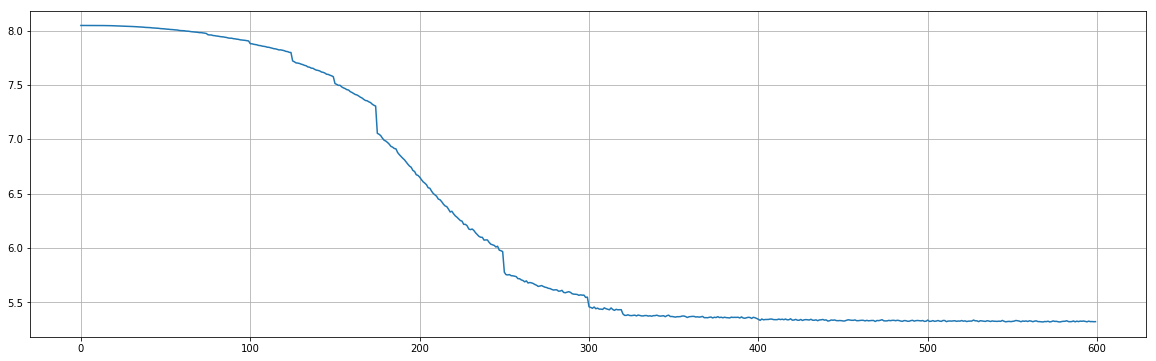

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

In [6]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_pred = gumbel_matrix.data.numpy()

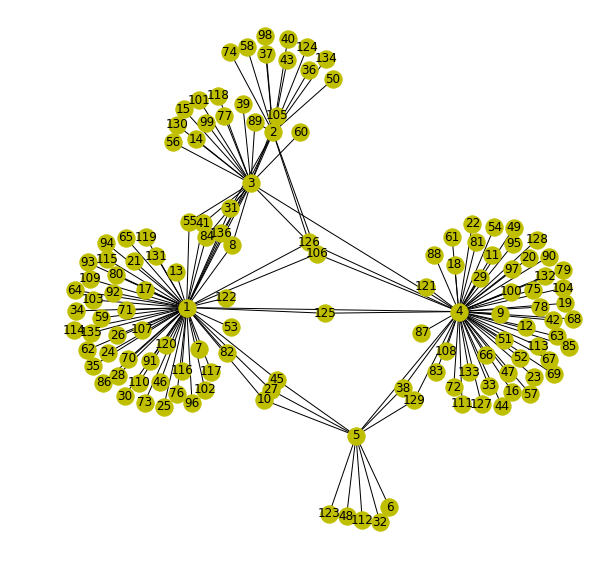

Modularity for American Revolution dataset is 0.58122


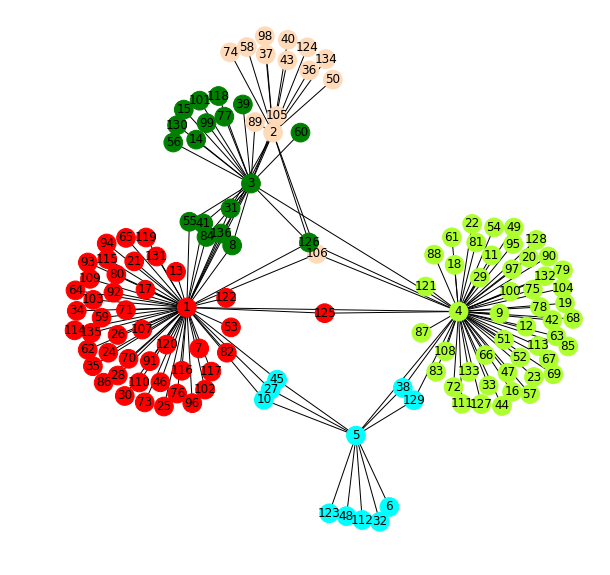

In [9]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
plt.axis('off')
#nx.draw(G, pos=pos, node_size=200, node_color=color, with_labels=True)
nx.draw_networkx(G, pos=pos,node_color="y", node_size=300, with_labels=True)
plt.show()
print('Modularity for American Revolution dataset is %.5f' %mod_calc(G,'American_Revolution',labels_pred))

color = []
for c in range(len(gumbel_matrix)):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('peachpuff')
    elif(gumbel_matrix[c] == 3):
        color.append('greenyellow')
    elif(gumbel_matrix[c] == 4):
        color.append('aqua')
    elif(gumbel_matrix[c] == 5):
        color.append('lightcyan')
    elif(gumbel_matrix[c] == 6):
        color.append('thistle')
    elif(gumbel_matrix[c] == 7):
        color.append('gold')
    elif(gumbel_matrix[c] == 8):
        color.append('m')
plt.figure(figsize=(10, 10))
options = {
    'node_color': color,
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
#nx.draw(G, **options)
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=350, node_color=color, with_labels=True)
plt.show()

In [3]:
import networkx as nx
from karateclub import MNMF,DANMF,EdMot,GEMSEC,SCD

model3 = EdMot()
model3.fit(G)
cluster_membership3 = model3.get_memberships()
clusters3 = cluster_membership3
labels_pred3 = list(clusters3.values())

print('Modularity of such partition for EdMot is %.6f' %get_modularity(G, labels_pred3))

Calculating modularity for undirected graph
Modularity of such partition for EdMot is 0.578894


In [4]:
model4 = GEMSEC(clusters=clusters_number)
model4.fit(G)
cluster_membership4 = model4.get_memberships()
clusters4 = cluster_membership4
labels_pred4 = list(clusters4.values())
print('Modularity of such partition for GEMSEC is %.6f' %get_modularity(G, labels_pred4))

Calculating modularity for undirected graph
Modularity of such partition for GEMSEC is 0.456718


In [10]:
model5 = SCD()
model5.fit(G)
cluster_membership5 = model5.get_memberships()
clusters5 = cluster_membership5
labels_pred5 = list(clusters5.values())
print('Modularity of such partition for SCD is %.6f' %get_modularity(G, labels_pred5))

Calculating modularity for undirected graph
Modularity of such partition for SCD is -0.071503


In [15]:
model1 = MNMF(clusters=2)
model1.fit(G)
cluster_membership1 = model1.get_memberships()
clusters1 = cluster_membership1
labels_pred1 = list(clusters1.values())
print('Modularity of such partition for MNMF is %.6f' %get_modularity(G, labels_pred1))

Calculating modularity for undirected graph
Modularity of such partition for MNMF is 0.345477


In [26]:
model2 = DANMF(layers=[64,10])
model2.fit(G)
cluster_membership2 = model2.get_memberships()
clusters2 = cluster_membership2
labels_pred2 = list(clusters2.values())
print('Modularity of such partition for DANMF is %.6f' %get_modularity(G, labels_pred2))

Calculating modularity for undirected graph
Modularity of such partition for DANMF is -0.135956
